<a href="https://colab.research.google.com/github/vitorkol/calculate-a-daily-rate/blob/master/calculate_a_daily_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este trabalho foi desenvolvido por Vitor Campos Miguel Neves, para o módulo 1 do Bootcamp DiversiData - Pan

**Importação das Bibliotecas**

In [3]:
import pandas as pd
import plotly.express as px #Essa biblioteca pertimite que seja criado gráficos dinâmicos
import seaborn as sns #Essa biblioteca para criação de gráficos 
import numpy as np
import plotly.graph_objects as go #Essa biblioteca permite que seja criado e concatenados gráficos de diferentes tipos
from sklearn.preprocessing import StandardScaler #Prepara o notebook para  o processamento permitindo realizar a padronização dos dados
from sklearn.cluster import KMeans #Prepara o ambiente para o processamento de um ou mais notebooks para realizar o supervionamento não monitorado pelo KMeans
from sklearn.linear_model import LinearRegression #Prepara o ambiente para realizar análises de regressão Linear
from sklearn.metrics import mean_squared_error, mean_absolute_error #

**Importação da Base de Dados**

In [4]:
#Abrindo o arquivo para leitura dos dados
url = "https://raw.githubusercontent.com/vitorkol/calculate-a-daily-rate/master/dataset/custo_diaria.csv"
custo_diaria = pd.read_csv(url, sep = ';')

In [ ]:
#Comentário qualquer
custo_diaria.head()

,qtd_pessoas,valor_diaria
0,1,150
1,4,385
2,6,499
3,10,680
4,13,735


In [ ]:
custo_diaria.shape

(15, 2)

In [ ]:
custo_diaria["valor_diaria"].unique()

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680])

In [ ]:
x_vl_diaria = custo_diaria.iloc[:, [0, 1]].values
x_vl_diaria[:10]

array([[   1,  150],
       [   4,  385],
       [   6,  499],
       [  10,  680],
       [  13,  735],
       [  15,  859],
       [  18,  989],
       [  22, 1075],
       [  25, 1500],
       [  30, 1850]])

In [ ]:
wcss_vl_diaria = []
for i in range (1,11):
    Kmeans_vl_diaria = KMeans(n_clusters=i, random_state=0)
    Kmeans_vl_diaria.fit(x_vl_diaria)
    wcss_vl_diaria.append(Kmeans_vl_diaria.inertia_)

In [ ]:
for i in range(len(wcss_vl_diaria)):
    print('Cluster',i,'Valor do wcss',wcss_vl_diaria[i])

Cluster 0 Valor do wcss 9488563.333333332
Cluster 1 Valor do wcss 1626091.4464285714
Cluster 2 Valor do wcss 940676.5166666667
Cluster 3 Valor do wcss 468794.56666666665
Cluster 4 Valor do wcss 276595.73333333334
Cluster 5 Valor do wcss 186440.0
Cluster 6 Valor do wcss 126587.5
Cluster 7 Valor do wcss 69734.16666666667
Cluster 8 Valor do wcss 49431.66666666667
Cluster 9 Valor do wcss 30995.166666666668


In [ ]:
gr_cotovelo_vl_diaria = px.line(x= range(1,11), y=wcss_vl_diaria)
gr_cotovelo_vl_diaria.show()

In [ ]:
Kmeans_vl_diaria = KMeans(n_clusters=3, random_state=0)
label_cluster_vl_diaria = Kmeans_vl_diaria.fit_predict(x_vl_diaria)

In [ ]:
label_cluster_vl_diaria

array([2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
centroides_vl_diaria = Kmeans_vl_diaria.cluster_centers_
centroides_vl_diaria

array([[  20.        , 1105.75      ],
       [  42.33333333, 2226.16666667],
       [   6.8       ,  489.8       ]])

In [ ]:
gr_vl_diaria = px.scatter(x = x_vl_diaria[:,0], y = x_vl_diaria[:,1], color = label_cluster_vl_diaria)
gr_centroide_vl_diaria = px.scatter(x = centroides_vl_diaria[:,0], y = centroides_vl_diaria[:,1], size = [7,7,7])
gr_final_vl_diaria = go.Figure(data = gr_vl_diaria.data + gr_centroide_vl_diaria.data)
gr_final_vl_diaria.show()

**Regressão Linear**

In [ ]:
#Pré visualizção de dados estatisticos para consulta com base no arquivo de dados.
custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


**Criando variáveis para gerar o gráfico de correlação**

In [ ]:
#Criando a variável X com valor quantidade de pessoas
x_qtde_pessoas = custo_diaria.iloc[:, 0].values
x_qtde_pessoas[:10]

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30])

In [ ]:
#Criando a variável Y com valor da diária
y_vl_diaria = custo_diaria.iloc[:, 1].values
y_vl_diaria[:10]

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850])

In [ ]:
#Cria uma matriz com o coeficiente de correlação com base entre dois conjuntos de dados
np.corrcoef(x_qtde_pessoas,y_vl_diaria)

array([[1.        , 0.99206905],
       [0.99206905, 1.        ]])

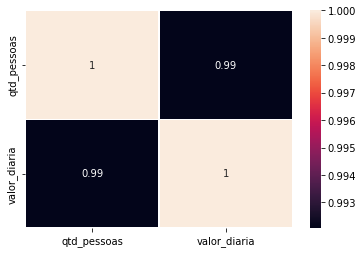

In [ ]:
correl = custo_diaria.corr()
plot = sns.heatmap(correl, annot = True, linewidths = .3)
plot

**Preparando os dados através do T = Tranformação**

In [ ]:
#Transformando os dados de uma lista para uma matriz
x_qtde_pessoas = x_qtde_pessoas.reshape(-1,1)
x_qtde_pessoas.shape

(15, 1)

In [ ]:
#Criando objto do tipo de regressão linear
prev_vl_diaria = LinearRegression()

In [ ]:
#Treinando o modelo para aprender com os dados
prev_vl_diaria.fit(x_qtde_pessoas,y_vl_diaria)

LinearRegression()

In [ ]:
#
prev_vl_diaria.intercept_

array([186.00229281])

In [ ]:
#
prev_vl_diaria.coef_

array([[51.14094547]])

In [ ]:
#Criando a previsão de custo por pessoa, para saber o custo do imóvel alugado
prev_precos = prev_vl_diaria.predict(x_qtde_pessoas)

In [ ]:
prev_precos

array([[ 237.14323829],
       [ 339.42512923],
       [ 390.5660747 ],
       [ 492.84796565],
       [ 543.98891112],
       [ 697.41174754],
       [ 799.69363849],
       [ 850.83458396],
       [ 953.1164749 ],
       [1004.25742038],
       [1208.82120227],
       [1106.53931132],
       [1311.10309321],
       [1362.24403869],
       [1464.52592963],
       [1566.80782058],
       [1720.230657  ],
       [1822.51254794],
       [1873.65349341],
       [2231.64011172],
       [2333.92200267],
       [2385.06294814],
       [2487.34483909],
       [2589.62673003],
       [2743.04956645],
       [2794.19051192],
       [2845.3314574 ],
       [2896.47240287],
       [3152.17713023],
       [3254.45902118]])

**Transformando os dados da matriz em um vetor para o utilização do gráfico**

In [ ]:
#Transforma os valores convertidos em matriz, novamente para vetor
x_qtde_pessoas.ravel()
#y_vl_diaria.ravel()

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [ ]:
grafico = px.scatter(x = x_qtde_pessoas.ravel(), y = y_vl_diaria.ravel())
grafico.show()

In [ ]:
grafico = px.scatter(x = x_qtde_pessoas.ravel(), y = y_vl_diaria.ravel())
grafico.add_scatter(x = x_qtde_pessoas.ravel(), y = prev_precos.ravel(), name= 'previsões')
grafico.show()

In [ ]:
qtde_pessoas = 27
prev_vl_diaria.intercept_ + prev_vl_diaria.coef_ * qtde_pessoas

array([[1566.80782058]])

In [ ]:
prev_vl_diaria.predict([[17]])

array([[1055.39836585]])

In [ ]:
prev_vl_diaria.score(x_qtde_pessoas, y_vl_diaria)

0.9577871649322629

In [ ]:
MSE = mean_squared_error(y_vl_diaria, prev_precos)

In [ ]:
MSE

36867.67840031127

In [ ]:
qtde = 25
custo_diaria.valor_diaria[14] - (prev_vl_diaria.intercept_ + prev_vl_diaria.coef_ * qtde)

array([[35.47407037]])

In [ ]:
mean_absolute_error(y_vl_diaria, prev_precos)

138.91296481574125